In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from tqdm.notebook import tqdm
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [34]:
df = pd.read_csv('lung-cancer_csv.csv')


In [35]:
df.shape


(32, 57)

In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 57 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   class        32 non-null     int64  
 1   attribute2   32 non-null     int64  
 2   attribute3   32 non-null     int64  
 3   attribute4   32 non-null     int64  
 4   attribute5   28 non-null     float64
 5   attribute6   32 non-null     int64  
 6   attribute7   32 non-null     int64  
 7   attribute8   32 non-null     int64  
 8   attribute9   32 non-null     int64  
 9   attribute10  32 non-null     int64  
 10  attribute11  32 non-null     int64  
 11  attribute12  32 non-null     int64  
 12  attribute13  32 non-null     int64  
 13  attribute14  32 non-null     int64  
 14  attribute15  32 non-null     int64  
 15  attribute16  32 non-null     int64  
 16  attribute17  32 non-null     int64  
 17  attribute18  32 non-null     int64  
 18  attribute19  32 non-null     int64  
 19  attribute2

In [37]:
df.describe()


,class,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,attribute10,...,attribute48,attribute49,attribute50,attribute51,attribute52,attribute53,attribute54,attribute55,attribute56,attribute57
count,32.000000,32.000000,32.000000,32.000000,28.000000,32.000000,32.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2.031250,0.031250,2.375000,2.031250,1.392857,0.281250,2.187500,2.125000,2.406250,1.156250,...,2.062500,2.062500,2.000000,2.000000,2.000000,1.843750,1.843750,1.562500,1.812500,1.718750
std,0.782237,0.176777,0.553581,1.031265,0.566947,0.456803,0.737804,0.751343,0.756024,0.514899,...,0.245935,0.245935,0.359211,0.359211,0.508001,0.447889,0.447889,0.504016,0.396558,0.456803
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,0.000000,2.000000,1.750000,1.000000,0.000000,2.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
50%,2.000000,0.000000,2.000000,2.000000,1.000000,0.000000,2.000000,2.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,3.000000,0.000000,3.000000,3.000000,2.000000,1.000000,3.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,3.000000,1.000000,3.000000,3.000000,2.000000,1.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000


In [39]:
columns = list(df.columns)
for col in columns:
	if col == 'class':
		continue

	filtered_columns = [col]
	for col1 in df.columns:
		if((col == col1) | (col == 'class')):
			continue

		val = df[col].corr(df[col1])

		if val > 0.7:
			# If the correlation between the two
			# features is more than 0.7 remove
			columns.remove(col1)
			continue
		else:
			filtered_columns.append(col1)

	# After each iteration filter out the columns
	# which are not highly correlated features.
	df = df[filtered_columns]
df.shape


(32, 53)

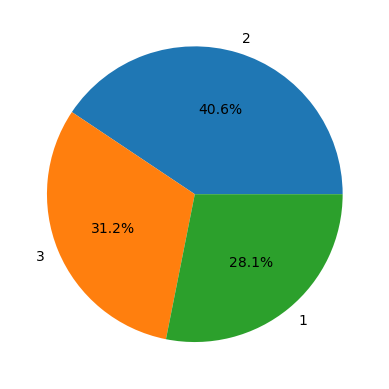

In [55]:
x = df['class'].value_counts()
plt.pie(x.values,
		labels = x.index,
		autopct='%1.1f%%')
plt.show()


In [56]:
features = df.drop('class', axis=1)
target = df['class']

X_train, X_val,\
	Y_train, Y_val = train_test_split(features, target,
									test_size=0.2,
									random_state=10)
X_train.shape, X_val.shape

((25, 52), (7, 52))